# **Introduction**

**About the Dataset**

The data is related with direct marketing
campaigns of a Portuguese banking institution. The marketing campaigns were based on
phone calls. Often, more than one contact to the same client was required, in order to
assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed.The
classification goal is to predict if the client will subscribe (yes/no) a term deposit.

Response variable: Variable y (subscription to a term deposit)

**Data Description**

*bank client data:*
*   age (numeric)
*   job : type of job (categorical: 'admin.','blue-collar', entrepreneur','housemaid','management','retired','self-em
ployed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','univer
sity.degree','unknown')
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has a housing loan? (categorical: 'no','yes','unknown')
* loan: has a personal loan? (categorical: 'no','yes','unknown')

*related with the last contact of the current campaign:*
* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* duration: last contact duration, in seconds (numeric). 
Important note: this
attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*other attributes:*
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')


**Research Questions**

* What impact does level of education have on the likelihood of a client subscribing to a term deposit?
* Does the outcome of a previous marketing campaign have an impact on the rate of term deposit subscriptions?
* Does impact does the duration of the phonecall have on the likelihood of a client subscribing to a term deposit? ?

Importing basics for the running of the project.

In [5]:
from google.colab import auth
auth.authenticate_user()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all libraries for the notebook

In [8]:
import os, types
import pandas as pd
import numpy as np
%matplotlib inline
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import seaborn as sns
import scipy as sp
import scipy.stats as sps
import seaborn as sb
from scipy import stats
import seaborn as sns
import scipy as sp
import scipy.stats as sps
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict
#from pandas_profiling import ProfileReport

Reading in the data and getting some basic description for the data

In [13]:
#read files
bank=pd.read_csv('/content/drive/MyDrive/4_Senior/2_DS_320/Project 1/data/bank1.csv')
#bank=pd.read_csv('bank1.csv')
print(type(bank))
bank.head()

<class 'pandas.core.frame.DataFrame'>


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
bank.shape

(4521, 17)

There are 4521 rows and 17 columns in the dataset

In [16]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


There are 7 quantitative and 10 qualitative features within the 17 features in the dataset

In [17]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Of the 7 quantitative feature, there are no missing values as they all have a count of 4,521 which matches the shape of the data seen above. 

Previous seems to have a significant number of 0 values. The 25%, 50%, and 75% quartiles are all 0 indicating that approximately 75% of the column has 0 values. There is a similar occurence with pdays. 75% of the feature has -1 values. These two features may be better suited as categorical features. We will discern if we should convert these quantitative features into categorical features once we have completed our exploratory data analysis. 

# **Exploratory Data Analysis**

We will now begin our exploratory Data Analysis of this dataset. 

## Quantitative Features


<Figure size 1080x360 with 0 Axes>

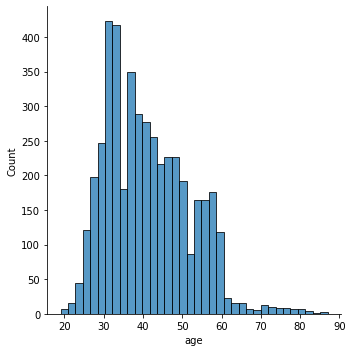

In [18]:
#Histogram of Age
plt.figure(figsize=(15,5))
sns.displot(bank['age'])
plt.show()

<function matplotlib.pyplot.show>

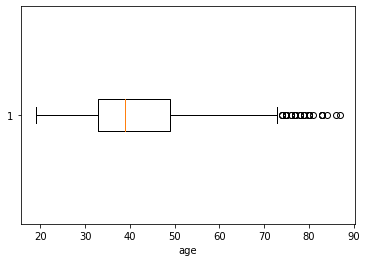

In [19]:
#boxplot of age
plt.boxplot(bank['age'], vert=False)
plt.xlabel ("age")
plt.show

Age seems to be relativley normally distributed with a couple of outliers. It is slightly right skewed. 

In [20]:
#find the skewness of age
print(bank['age'].skew())

0.6995014533559305


Age has a skewness of 0.700. This is good, this feature **will not** be transformed. 

<Figure size 864x720 with 0 Axes>

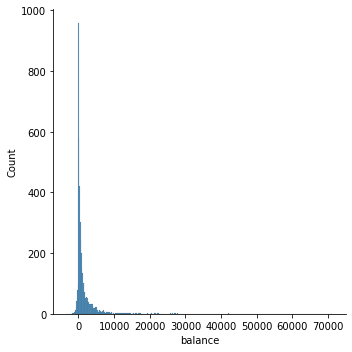

In [21]:
#Histogram of Balance
plt.figure(figsize=(12,10))
sns.displot(bank['balance'])
plt.show()

<function matplotlib.pyplot.show>

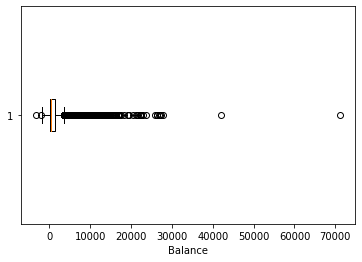

In [22]:
#boxplot of balance
plt.boxplot(bank['balance'], vert=False)
plt.xlabel ("Balance")
plt.show

Balance is very right skewed. 

In [23]:
print(bank['balance'].skew())

6.596430546295735


Balance has a skewness of 6.60. This feature **will** be transformed. 

<Figure size 864x360 with 0 Axes>

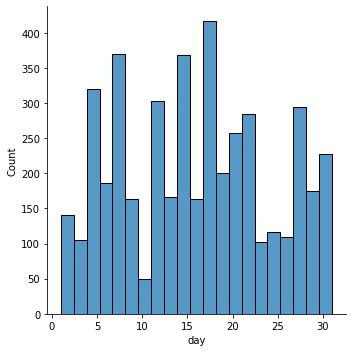

In [24]:
#Histogram of Day
plt.figure(figsize=(12,5))
sns.displot(bank['day'])
plt.show()

<function matplotlib.pyplot.show>

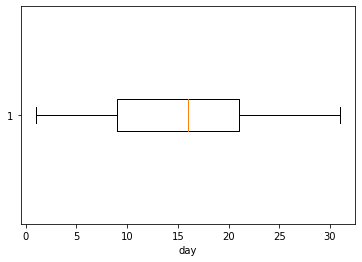

In [25]:
#boxplot of day
plt.boxplot(bank['day'], vert=False)
plt.xlabel ("day")
plt.show

Day does not have any skewness.

In [26]:
print(bank['day'].skew())

0.09462690455175846


Day has a skewness of 0.095. This feature **will not** be transformed. 

<Figure size 864x360 with 0 Axes>

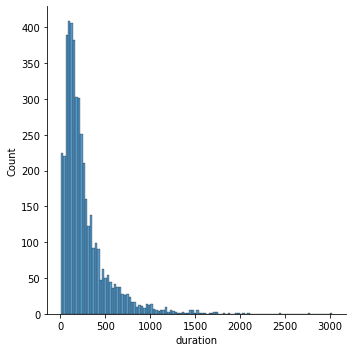

In [27]:
#Histogram of Duration
plt.figure(figsize=(12,5))
sns.displot(bank['duration'])
plt.show()

<function matplotlib.pyplot.show>

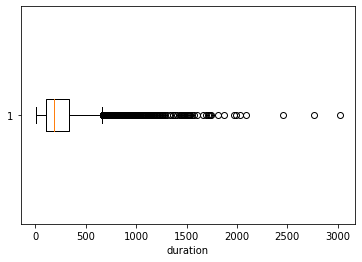

In [28]:
plt.boxplot(bank['duration'], vert=False)
plt.xlabel ("duration")
plt.show

Duration is right skewed with numerous outliers

In [29]:
print(bank['duration'].skew())

2.7724197169136455


Duration has a skewness of 2.77. We **will** transform this feature. 

<Figure size 864x360 with 0 Axes>

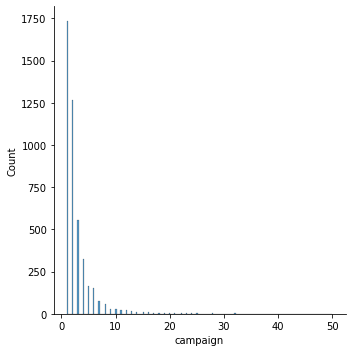

In [30]:
#Histogram of Campaign
plt.figure(figsize=(12,5))
sns.displot(bank['campaign'])
plt.show()

<function matplotlib.pyplot.show>

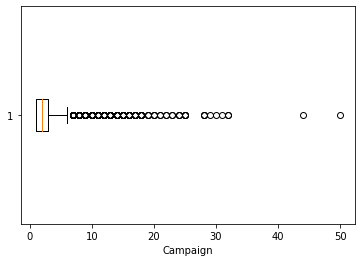

In [31]:
plt.boxplot(bank['campaign'],vert=False)
plt.xlabel ("Campaign")
plt.show

Campaign is very right skewed with numerous outliers

In [32]:
print(bank['campaign'].skew())

4.74391446894159


Campaign has a skewness of 4.74. This feature **will** be transformed. 

<Figure size 864x360 with 0 Axes>

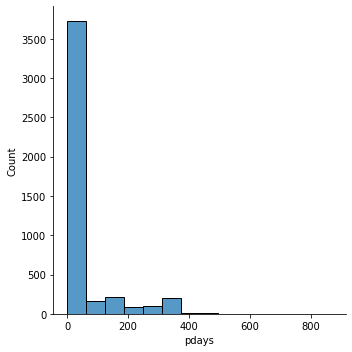

In [33]:
#Histogram of Pdays
plt.figure(figsize=(12,5))
sns.displot(bank['pdays'])
plt.show()

<function matplotlib.pyplot.show>

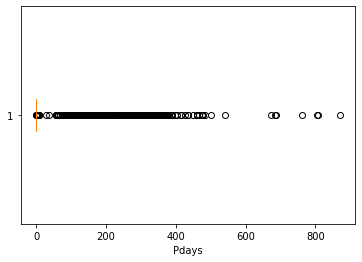

In [34]:
#boxplot of pdays
plt.boxplot(bank['pdays'], vert=False)
plt.xlabel ("Pdays")
plt.show

Pdays is right skewed. 

In [35]:
print(bank['pdays'].skew())

2.71707136656418


Pdays has a skewness of 2.72. This feature **will** be transformed. 

<Figure size 864x360 with 0 Axes>

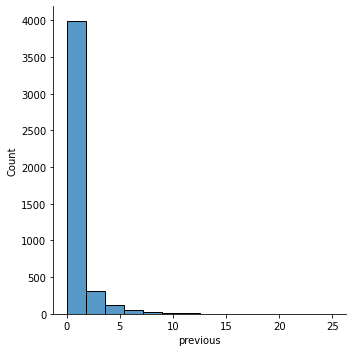

In [36]:
#Histogram of Previous
plt.figure(figsize=(12,5))
sns.displot(bank['previous'])
plt.show()

<function matplotlib.pyplot.show>

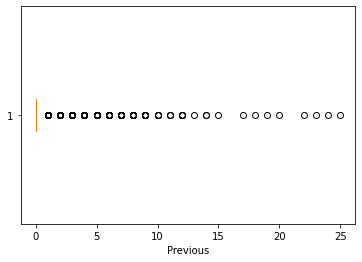

In [37]:
plt.boxplot(bank['previous'], vert=False)
plt.xlabel ("Previous")
plt.show

Previous is right skewed. 

In [38]:
print(bank['previous'].skew())

5.875258677896706


Previous has a skewness of 5.88. This feature **will** be transformed. 

As we can see in all the bar and boxplots, most of the quantitative features are very skewed, so we will be transforming them further on in the project. 

## Correlation 

We will now examine the correlation between pairs of quantitative features.

In [39]:
#plot correlation heatmap to find out correlations
bank.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,balance,day,duration,campaign,pdays,previous
age,1.0,0.08382,-0.01785,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.08382,1.0,-0.008677,-0.01595,-0.009976,0.009437,0.0262
day,-0.01785,-0.008677,1.0,-0.02463,0.1607,-0.09435,-0.05911
duration,-0.002367,-0.01595,-0.02463,1.0,-0.06838,0.01038,0.01808
campaign,-0.005148,-0.009976,0.1607,-0.06838,1.0,-0.09314,-0.06783
pdays,-0.008894,0.009437,-0.09435,0.01038,-0.09314,1.0,0.5776
previous,-0.003511,0.0262,-0.05911,0.01808,-0.06783,0.5776,1.0


None of the features have strong positive or negative correlations. Pdays and previous have the strongest correlation at 0.578.

## Categorical Features

We used frequency tables to look at the number of times a value was repeated in each of the categorical feature. There are 10 different categorical features, so each one is explored below

In [40]:
bank["job"].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [41]:
bank["marital"].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [42]:
bank["education"].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [43]:
bank["default"].value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [44]:
bank["housing"].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [45]:
bank["loan"].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [46]:
bank["contact"].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [47]:
bank["month"].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [48]:
bank["poutcome"].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [49]:
bank["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

# Data Cleaning & Transformations

As mentioned above, there are no missing values within this dataset, so there was no need to remove any of our data and we used all of the data provided. 

Below, we transform the data that we decided were too skewed. All quantitative features apart from day and age will be transformed

In [50]:
#missing values in this dataset are denoted by "NaN" 
#just double checking to make sure there are not any missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Before we begin transforming variables we will convert pdays and previous into categorical variables. 

In [51]:
#discern how to divide pdays
bank['pdays'].value_counts()

-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: pdays, Length: 292, dtype: int64

In [52]:
bank['pdays'].describe()

count    4521.000000
mean       39.766645
std       100.121124
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

75% of values in pdays have a value of -1. 

In [53]:
#What is the statistical summary of values greater than -1
#Create a new pday column with only values greater than -1
www=bank[(bank['pdays']>-1) & (bank['pdays'] <872 )]

In [54]:
www['pdays'].describe()

count    816.000000
mean     224.865196
std      117.200417
min        1.000000
25%      136.000000
50%      189.000000
75%      330.000000
max      871.000000
Name: pdays, dtype: float64

189 is the median of values greater than -1. We will divide pdays into three categories. 

- no contact 
- less than 189
- more than 189


In [55]:
#create new categorical pday column
bins=[-2, -1, 189, 871]
labels=['No Contact', 'less than 189', 'More than 189']
bank['pdays_categorical'] = pd.cut(bank['pdays'], bins, labels=labels)

In [56]:
bank.pdays_categorical.value_counts()

No Contact       3705
less than 189     409
More than 189     407
Name: pdays_categorical, dtype: int64

In [57]:
#now lets create a new colum for previous
#previous
bank['previous'].value_counts()

0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
24       1
22       1
23       1
17       1
18       1
15       1
13       1
19       1
20       1
25       1
Name: previous, dtype: int64

In [58]:
bank['previous'].describe()

count    4521.000000
mean        0.542579
std         1.693562
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        25.000000
Name: previous, dtype: float64

Similar to pdays, 75% of values in previous have a value of 0.

In [59]:
#What is the statistical summary of values greater than 0
#Create a new pday column with only values greater than 0
yyy=bank[(bank['previous']>0) & (bank['previous'] <26 )]

In [60]:
www['previous'].describe()

count    816.000000
mean       3.006127
std        2.914101
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       25.000000
Name: previous, dtype: float64

2 is the median of values greater than 0. We will divide previous into three columns. 


- no contact 
- less than 2
- more than 2


In [61]:
#create new categorical colum of previous
bins=[-1, 0, 2, 25]
labels=['No Contact', 'less than 2', 'More than 2']
bank['previous_categorical'] = pd.cut(bank['previous'], bins, labels=labels)

In [62]:
bank.previous_categorical.value_counts()

No Contact     3705
less than 2     479
More than 2     337
Name: previous_categorical, dtype: int64

In [63]:
#check if the two new colums have been added to the dataset
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_categorical,previous_categorical
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,No Contact,No Contact
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,More than 189,More than 2
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,More than 189,less than 2
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,No Contact,No Contact
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,No Contact,No Contact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,No Contact,No Contact
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,No Contact,No Contact
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,No Contact,No Contact
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,More than 189,More than 2


In [64]:
#drop original pdays and previous columns
bank.drop("pdays", axis = 1, inplace=True)
bank.drop("previous", axis = 1, inplace=True)

In [65]:
#check if columns have been dropped
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y,pdays_categorical,previous_categorical
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,unknown,no,No Contact,No Contact
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,failure,no,More than 189,More than 2
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,failure,no,More than 189,less than 2
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,unknown,no,No Contact,No Contact
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,unknown,no,No Contact,No Contact


In [66]:
bank.shape

(4521, 17)

In [67]:
#lets look at balance again before transforming the variable. 
bank['balance'].describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

In [68]:
#lets see how many values are below 0.
y=bank['balance'] <0
print(y.sum())

366


The negative balances will make it difficult to transform this feature. Due to the fact that there are only 366 negative values. We will drop rows with negative balance values. We also believe a negative balance fundamentally means something different from a positive balance. 

In [69]:
bank=bank[bank['balance']>= 0]

In [70]:
bank.shape

(4155, 17)

We now have 4155 rows and 17 columns in the dataset. 

In [71]:
bank['balance'].value_counts()

0       357
2        24
1        15
4        13
5        11
       ... 
3516      1
2558      1
539       1
1041      1
1137      1
Name: balance, Length: 2079, dtype: int64

There 357 values with 0 in balance for a log transformation we will replace these values with 0.5 (half of the smallest non zero value)

In [72]:
#replace 0 values with 0.5. 
bank['balance']= bank['balance'].replace(0,0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
#check to see if the change occured 
bank['balance'].value_counts()

0.5       357
2.0        24
1.0        15
4.0        13
5.0        11
         ... 
3516.0      1
2558.0      1
539.0       1
1041.0      1
1137.0      1
Name: balance, Length: 2079, dtype: int64

0 has now been replaced with 0.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 864x360 with 0 Axes>

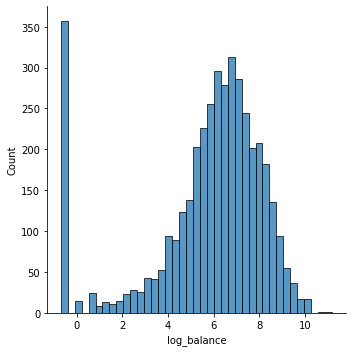

In [74]:
bank['log_balance'] = np.log(bank['balance'])
plt.figure(figsize=(12,5))
sns.displot(bank['log_balance'])
plt.show()

<function matplotlib.pyplot.show>

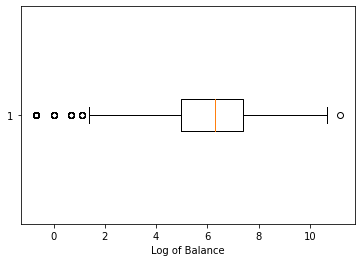

In [75]:
plt.boxplot(bank['log_balance'], vert=False)
plt.xlabel ("Log of Balance")
plt.show

In [76]:
print(bank['log_balance'].skew())

-1.236935033453174


The skewness of log balance is -1.23. This is better. 

In [77]:
bank['duration'].value_counts()
#There are no 0 values in duration

104    23
123    22
58     22
106    21
119    21
       ..
636     1
730     1
555     1
993     1
660     1
Name: duration, Length: 852, dtype: int64

In [78]:
bank['log_duration'] = np.log(bank['duration'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 864x360 with 0 Axes>

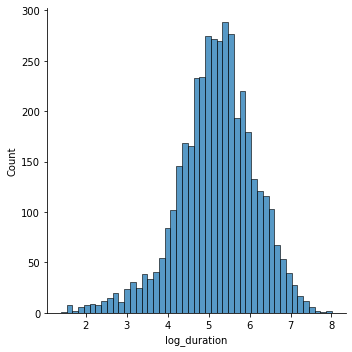

In [79]:
plt.figure(figsize=(12,5))
sns.displot(bank['log_duration'])
plt.show()

<function matplotlib.pyplot.show>

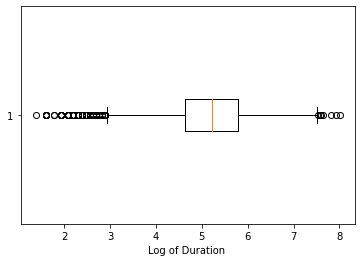

In [80]:
plt.boxplot(bank['log_duration'], vert=False)
plt.xlabel ("Log of Duration ")
plt.show

In [81]:
print(bank['log_duration'].skew())

-0.5103031204227104


Log of duration has a skewness of 0.517. This is good. 

In [82]:
bank['campaign'].value_counts()
#There are no 0 values in campaign

1     1593
2     1154
3      515
4      300
5      153
6      142
7       71
8       53
9       29
11      22
10      22
12      20
13      16
14      10
16       8
17       7
15       7
18       7
25       4
24       3
19       3
20       3
32       2
22       2
21       2
28       2
30       1
23       1
50       1
31       1
44       1
Name: campaign, dtype: int64

In [83]:
bank['log_campaign'] = np.log(bank['campaign'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 864x360 with 0 Axes>

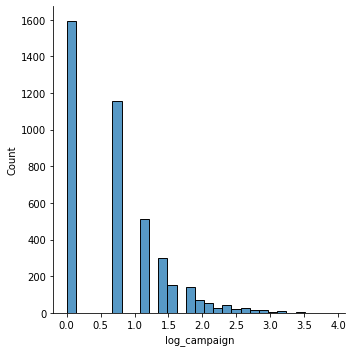

In [84]:
plt.figure(figsize=(12,5))
sns.displot(bank['log_campaign'])
plt.show()

<function matplotlib.pyplot.show>

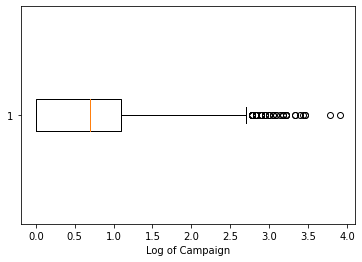

In [85]:
plt.boxplot(bank['log_campaign'], vert=False)
plt.xlabel ("Log of Campaign")
plt.show

In [86]:
print(bank['log_campaign'].skew())

0.864596228343754


Log of campaign has a skewness of 0.871. This is better.

## One-Hot Encode Categorical Variables 

The following qualitative variables well be one-hot encoded. 

- job       
- marital    
- education 
- default    
- housing    
- loan       
- contact   
- month      
- poutcome 
- y

We are one-hot encoding the response variable Y to have one colommn with 1 for 'yes' and 0 for 'no'

In [87]:
bank2 = pd.get_dummies(bank, columns = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'poutcome','pdays_categorical', 'previous_categorical','y'])

In [88]:
bank2.head()

,age,balance,day,duration,campaign,log_balance,log_duration,log_campaign,job_admin.,job_blue-collar,...,poutcome_success,poutcome_unknown,pdays_categorical_No Contact,pdays_categorical_less than 189,pdays_categorical_More than 189,previous_categorical_No Contact,previous_categorical_less than 2,previous_categorical_More than 2,y_no,y_yes
0,30,1787.0,19,79,1,7.488294,4.369448,0.000000,0,0,...,0,1,1,0,0,1,0,0,1,0
1,33,4789.0,11,220,1,8.474077,5.393628,0.000000,0,0,...,0,0,0,0,1,0,0,1,1,0
2,35,1350.0,16,185,1,7.207860,5.220356,0.000000,0,0,...,0,0,0,0,1,0,1,0,1,0
3,30,1476.0,3,199,4,7.297091,5.293305,1.386294,0,0,...,0,1,1,0,0,1,0,0,1,0
4,59,0.5,5,226,1,-0.693147,5.420535,0.000000,0,1,...,0,1,1,0,0,1,0,0,1,0


In [89]:
bank2.shape

(4155, 60)

We now have 4521 rows and 58 columns. Let us drop the quantitative variables which have been transformed.

In [90]:
bank2.drop("balance", axis = 1, inplace=True)
bank2.drop("duration", axis = 1, inplace=True)
bank2.drop("campaign", axis = 1, inplace=True)
bank2.drop("y_no", axis = 1, inplace=True)
#y_yes is the one hotted column with 1 for 'yes' and 0 for 'O' so we will be keeping it and we will drop y_no. 

In [91]:
bank2.head()

,age,day,log_balance,log_duration,log_campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,poutcome_other,poutcome_success,poutcome_unknown,pdays_categorical_No Contact,pdays_categorical_less than 189,pdays_categorical_More than 189,previous_categorical_No Contact,previous_categorical_less than 2,previous_categorical_More than 2,y_yes
0,30,19,7.488294,4.369448,0.000000,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
1,33,11,8.474077,5.393628,0.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,35,16,7.207860,5.220356,0.000000,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,30,3,7.297091,5.293305,1.386294,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0
4,59,5,-0.693147,5.420535,0.000000,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [92]:
bank2.shape

(4155, 56)

In [93]:
bank2.describe()

,age,day,log_balance,log_duration,log_campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,poutcome_other,poutcome_success,poutcome_unknown,pdays_categorical_No Contact,pdays_categorical_less than 189,pdays_categorical_More than 189,previous_categorical_No Contact,previous_categorical_less than 2,previous_categorical_More than 2,y_yes
count,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,...,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000,4155.000000
mean,41.297232,15.872202,5.733704,5.175186,0.717168,0.106137,0.202166,0.038748,0.026233,0.217329,...,0.045006,0.030084,0.813959,0.813959,0.096029,0.090012,0.813959,0.109266,0.076775,0.117930
std,10.694177,8.195098,2.571440,0.949589,0.718783,0.308050,0.401664,0.193018,0.159848,0.412478,...,0.207342,0.170840,0.389187,0.389187,0.294666,0.286233,0.389187,0.312010,0.266266,0.322564
min,19.000000,1.000000,-0.693147,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,9.000000,4.952293,4.644391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,16.000000,6.295266,5.225747,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,49.000000,21.000000,7.400619,5.793014,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,87.000000,31.000000,11.173080,8.014666,3.912023,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
bank2=bank2.astype('float64')

## Preparation of Data

In [95]:
# Split Train and Test Set (80/20)
X = bank2.drop('y_yes', axis=1)
Y = bank2['y_yes']

In [96]:
bank2['y_yes'].value_counts()

0.0    3665
1.0     490
Name: y_yes, dtype: int64

3665 clients did not subcribe while 490 clients subcribed to the campaign. The disparity between yes and no is concerning, there is an unequal distribution. 

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3324, 55)
(831, 55)
(3324,)
(831,)


In [98]:
#standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Trees

We will now fit our data into a decision tree. We will be using precison and recall as peformance measures for our model. 

### Model 1

In [99]:
#implement an initial decision tree with max depth 3 & min leaf samples 5
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier (max_depth=3, min_samples_leaf=5, random_state=42)
clf.fit(X_train_scaled,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

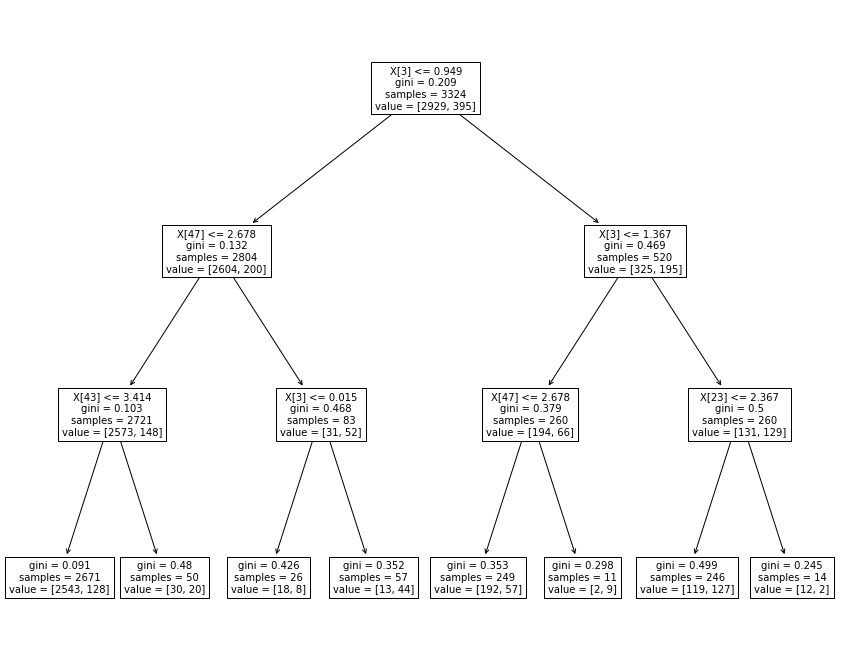

In [100]:
#plot the decision tree
import sklearn.tree as tree
fig, ax = plt.subplots(figsize=(15, 12))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [101]:
X_train["pred"] = clf.predict (X_train_scaled)
pd.crosstab (Y_train, X_train.pred)

pred,0.0,1.0
y_yes,,
0.0,2795,134
1.0,215,180


There are:

- 2795 true negatives
- 215 false negatives
- 134 false positives
- 180 true positives.

In [102]:
from sklearn.metrics import *
print ("Precision:", np.round (precision_score (Y_train, X_train.pred), 3))
print ("Recall:   ", np.round (recall_score (Y_train, X_train.pred), 3))

Precision: 0.573
Recall:    0.456


The precision is 0.57 and the recall is 0.46. The model is not performing well. 

In [103]:
# 5 fold cross validation
from sklearn.model_selection import cross_val_predict
bank_cv_pred = cross_val_predict (clf,  X_train_scaled, Y_train, cv=5)
print ("Precision:", np.round (precision_score (Y_train, bank_cv_pred), 3))
print ("Recall:   ", np.round (recall_score (Y_train, bank_cv_pred), 3))

Precision: 0.56
Recall:    0.319


With 5 fold cross validation the precision is 0.560 and the recall is 0.319. This is bad. 

In [104]:
pd.crosstab (Y_train, bank_cv_pred)

col_0,0.0,1.0
y_yes,,
0.0,2830,99
1.0,269,126


With 5 fold cross validation, there are: 
    
- 2830 true negatives
- 269 false negatives
- 99 false positives
- 126 true positives

### Model 2

In [105]:
#implement a new decision tree with max depth 5 & min leaf samples 10
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier (max_depth=5, min_samples_leaf=10, random_state=42)
clf2.fit(X_train_scaled,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

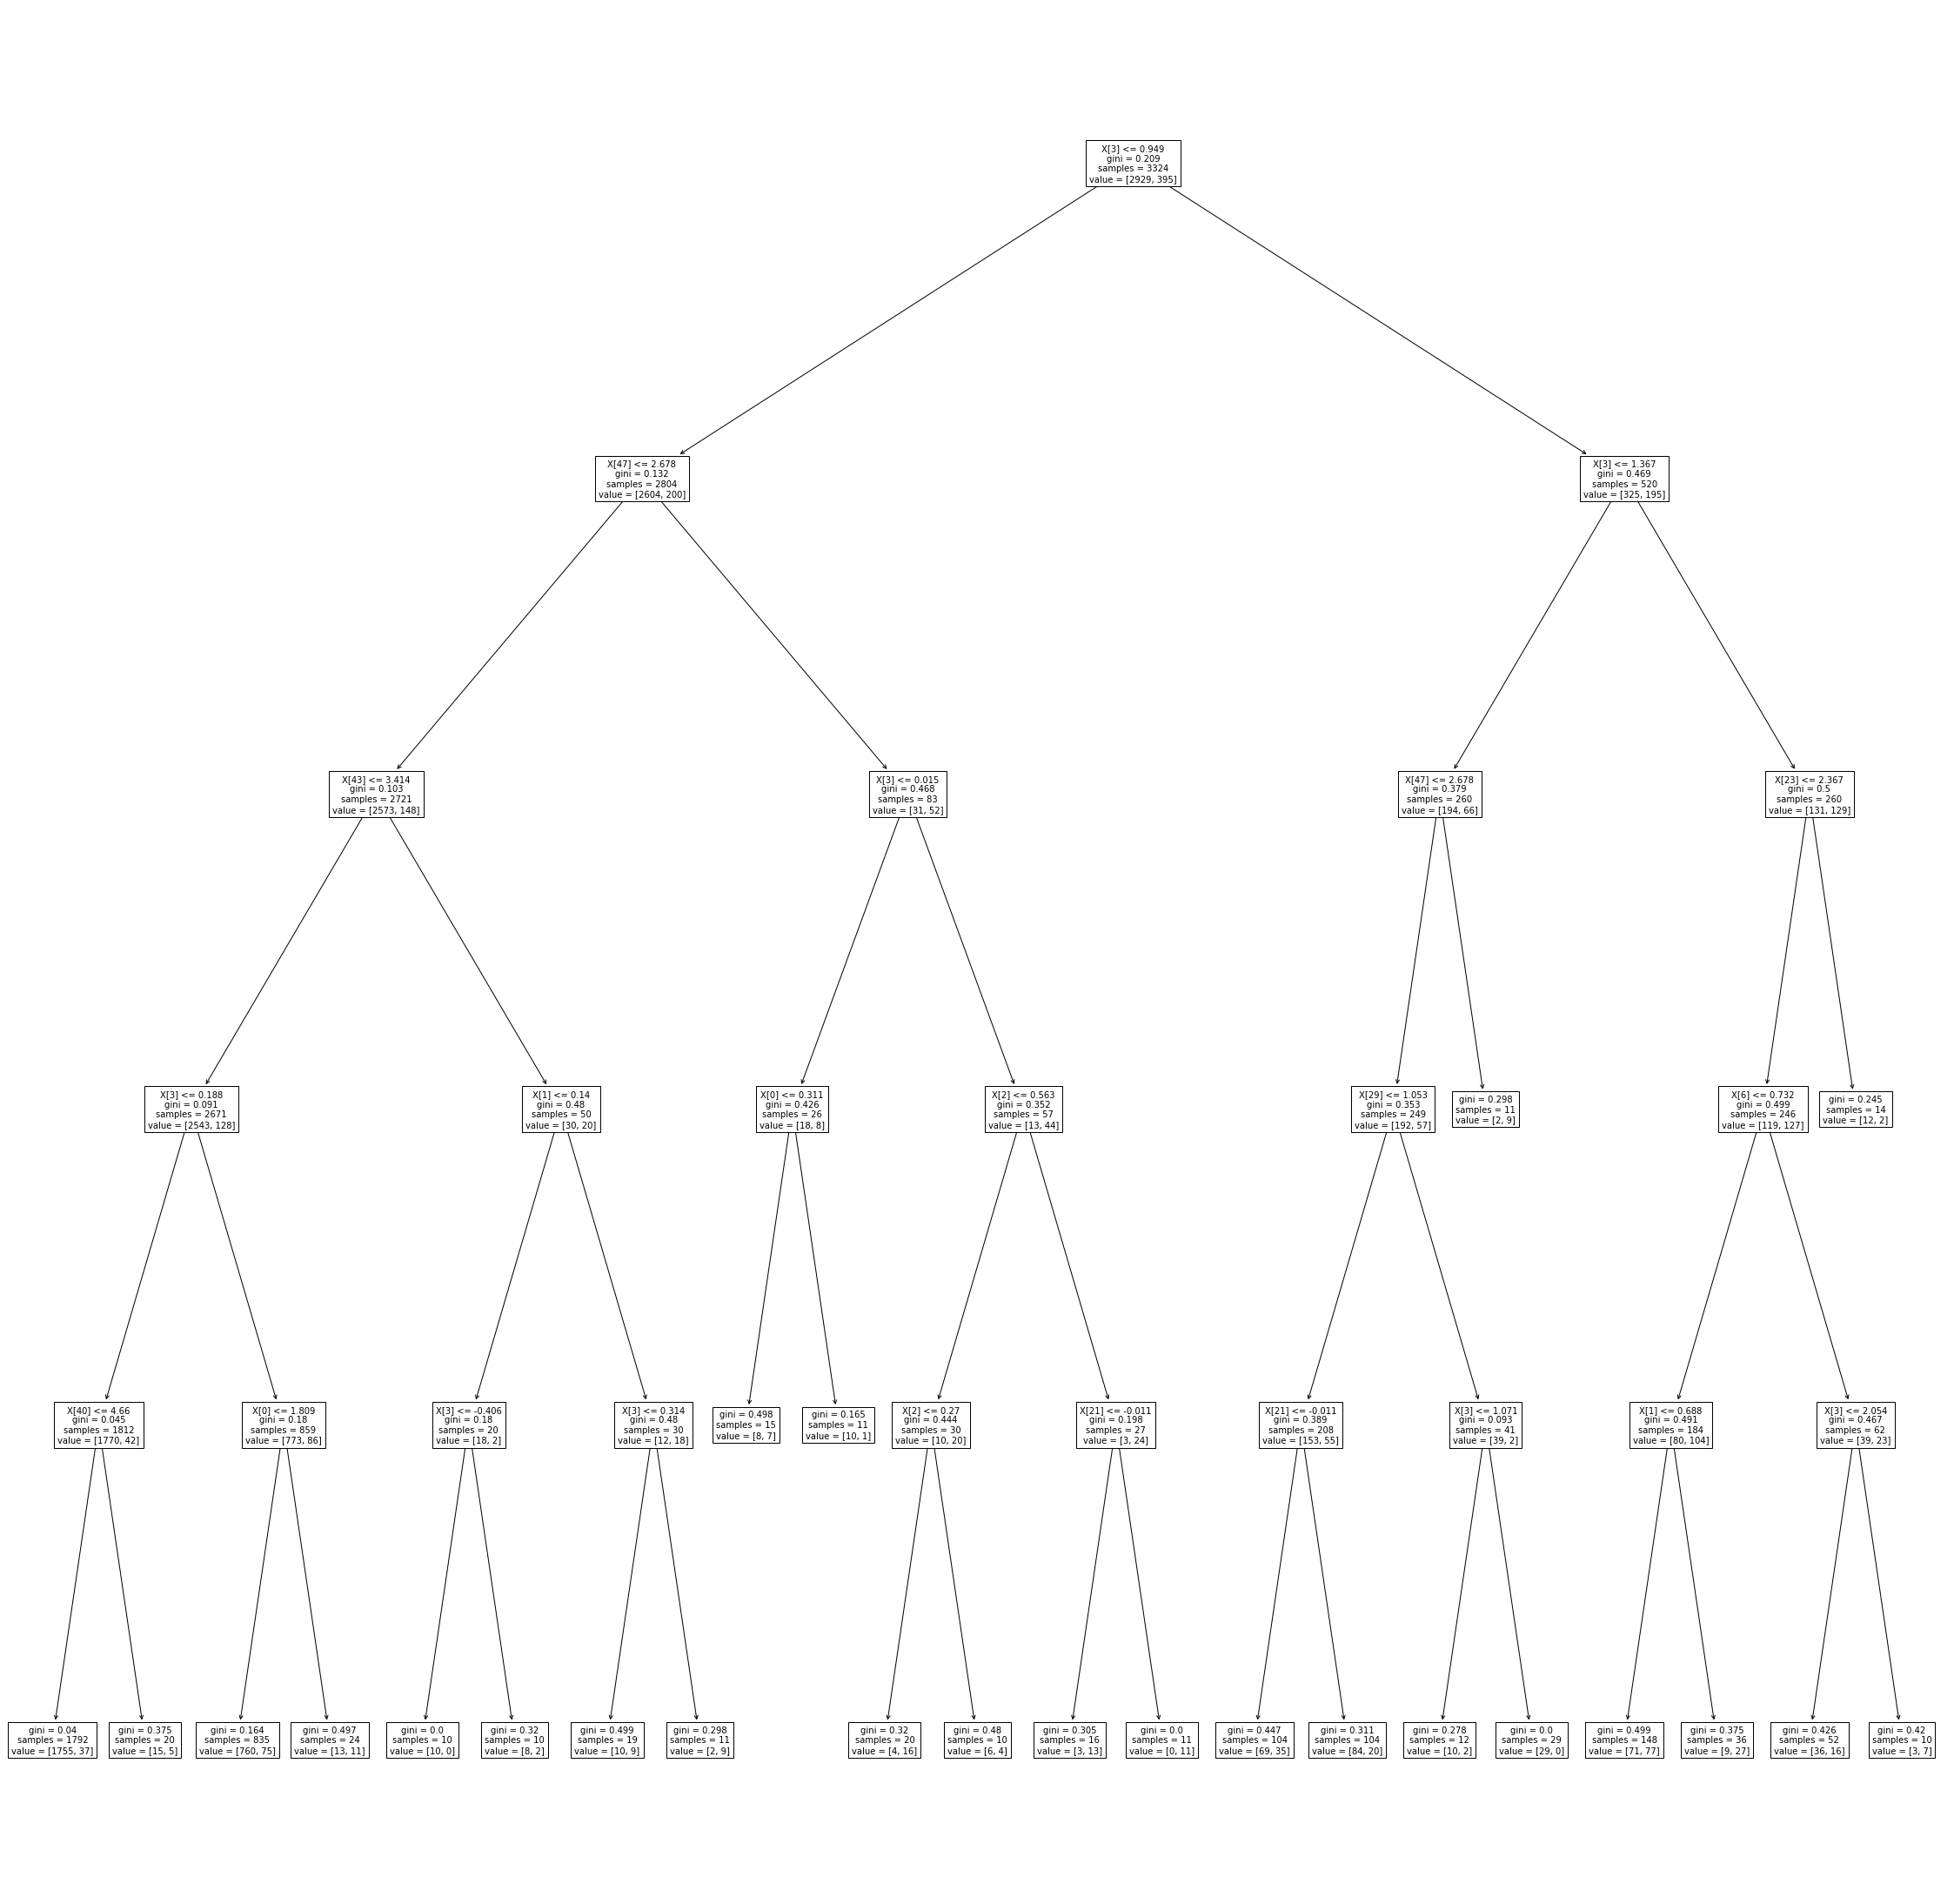

In [106]:
import sklearn.tree as tree
fig, ax = plt.subplots(figsize=(40, 40))
tree.plot_tree(clf2, fontsize=10)
plt.show()

In [107]:
X_train["preds"] = clf2.predict (X_train_scaled)
pd.crosstab (Y_train, X_train.preds)

preds,0.0,1.0
y_yes,,
0.0,2835,94
1.0,226,169


There are:

- 2835 true negatives
- 226 false negative
- 94 false positive
- 169 true positives
    

In [108]:
from sklearn.metrics import *
print ("Precision:", np.round (precision_score (Y_train, X_train.preds), 3))
print ("Recall:   ", np.round (recall_score (Y_train, X_train.preds), 3))

Precision: 0.643
Recall:    0.428


The precision is 0.643 and the recall is 0.428. This model is performing better than the previous one. 

In [109]:
#5 fold cross validation 
from sklearn.model_selection import cross_val_predict
bank_cv_preds = cross_val_predict (clf2,  X_train_scaled, Y_train, cv=5)
print ("Precision:", np.round (precision_score (Y_train, bank_cv_preds), 3))
print ("Recall:   ", np.round (recall_score (Y_train, bank_cv_preds), 3))

Precision: 0.52
Recall:    0.327


The precision is 0.52 and the recall is 0.327. Precision and recall have worsend with 5-fold cross validation. 

In [110]:
pd.crosstab (Y_train, bank_cv_preds)

col_0,0.0,1.0
y_yes,,
0.0,2810,119
1.0,266,129


With 5 fold validation, there are:
    
- 2810 true negatives
- 266 false negative
- 119 false positives
- 129 true positives

### Grid Search

In [111]:
#optimize to find optimal max_depth and min_samples_leaf for precision
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':(2, 3, 4, 5, 6, 7, 10, 20, 30), 'min_samples_leaf':(3, 4, 5, 10, 20)}
glf = DecisionTreeClassifier (random_state=42)
clf_gs = GridSearchCV (glf, parameters, scoring='precision')
clf_gs.fit (X_train_scaled, Y_train)
gs_results = pd.DataFrame (clf_gs.cv_results_)
print (clf_gs.best_estimator_)
print ("Best parameters:", clf_gs.best_params_)
gs_results

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=42)
Best parameters: {'max_depth': 3, 'min_samples_leaf': 20}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005894,0.001177,0.001571,0.000039,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.500000,0.549020,0.526316,0.566038,0.563636,0.541002,0.024901,24
1,0.005269,0.000237,0.001480,0.000028,2,4,"{'max_depth': 2, 'min_samples_leaf': 4}",0.500000,0.549020,0.526316,0.566038,0.563636,0.541002,0.024901,24
2,0.005022,0.000081,0.001540,0.000133,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.500000,0.549020,0.526316,0.566038,0.563636,0.541002,0.024901,24
3,0.004989,0.000098,0.001463,0.000052,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.500000,0.549020,0.526316,0.566038,0.563636,0.541002,0.024901,24
4,0.005529,0.001068,0.001970,0.000537,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.460000,0.549020,0.526316,0.566038,0.563636,0.533002,0.039142,31
5,0.007965,0.001478,0.001753,0.000484,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.500000,0.600000,0.566038,0.611111,0.553571,0.566144,0.039246,5
6,0.006697,0.000051,0.001511,0.000066,3,4,"{'max_depth': 3, 'min_samples_leaf': 4}",0.500000,0.600000,0.566038,0.611111,0.553571,0.566144,0.039246,5
7,0.006912,0.000251,0.001550,0.000048,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.500000,0.600000,0.566038,0.591837,0.553571,0.562289,0.035398,11
8,0.007878,0.001618,0.002009,0.000613,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.512821,0.600000,0.538462,0.600000,0.553571,0.560971,0.034428,13
9,0.007598,0.001887,0.001601,0.000122,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",0.578947,0.600000,0.538462,0.604651,0.606061,0.585624,0.025516,1


Max_depth=3 and min_samples_leaf=20 are the best parameters to optimize precision. 

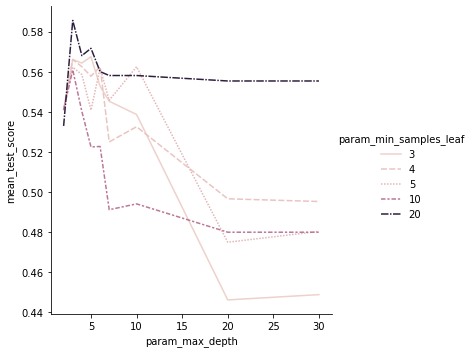

In [112]:
import seaborn as sb

sb.relplot (kind='line', x=gs_results.param_max_depth, y=gs_results.mean_test_score, 
             hue=gs_results.param_min_samples_leaf, style=gs_results.param_min_samples_leaf)
plt.show()

### Model 3

In [113]:
#implement a new decision tree with max depth 5 & min leaf samples 10 (optimize precision)
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier (max_depth=3, min_samples_leaf=20, random_state=42)
clf3.fit(X_train_scaled,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=42)

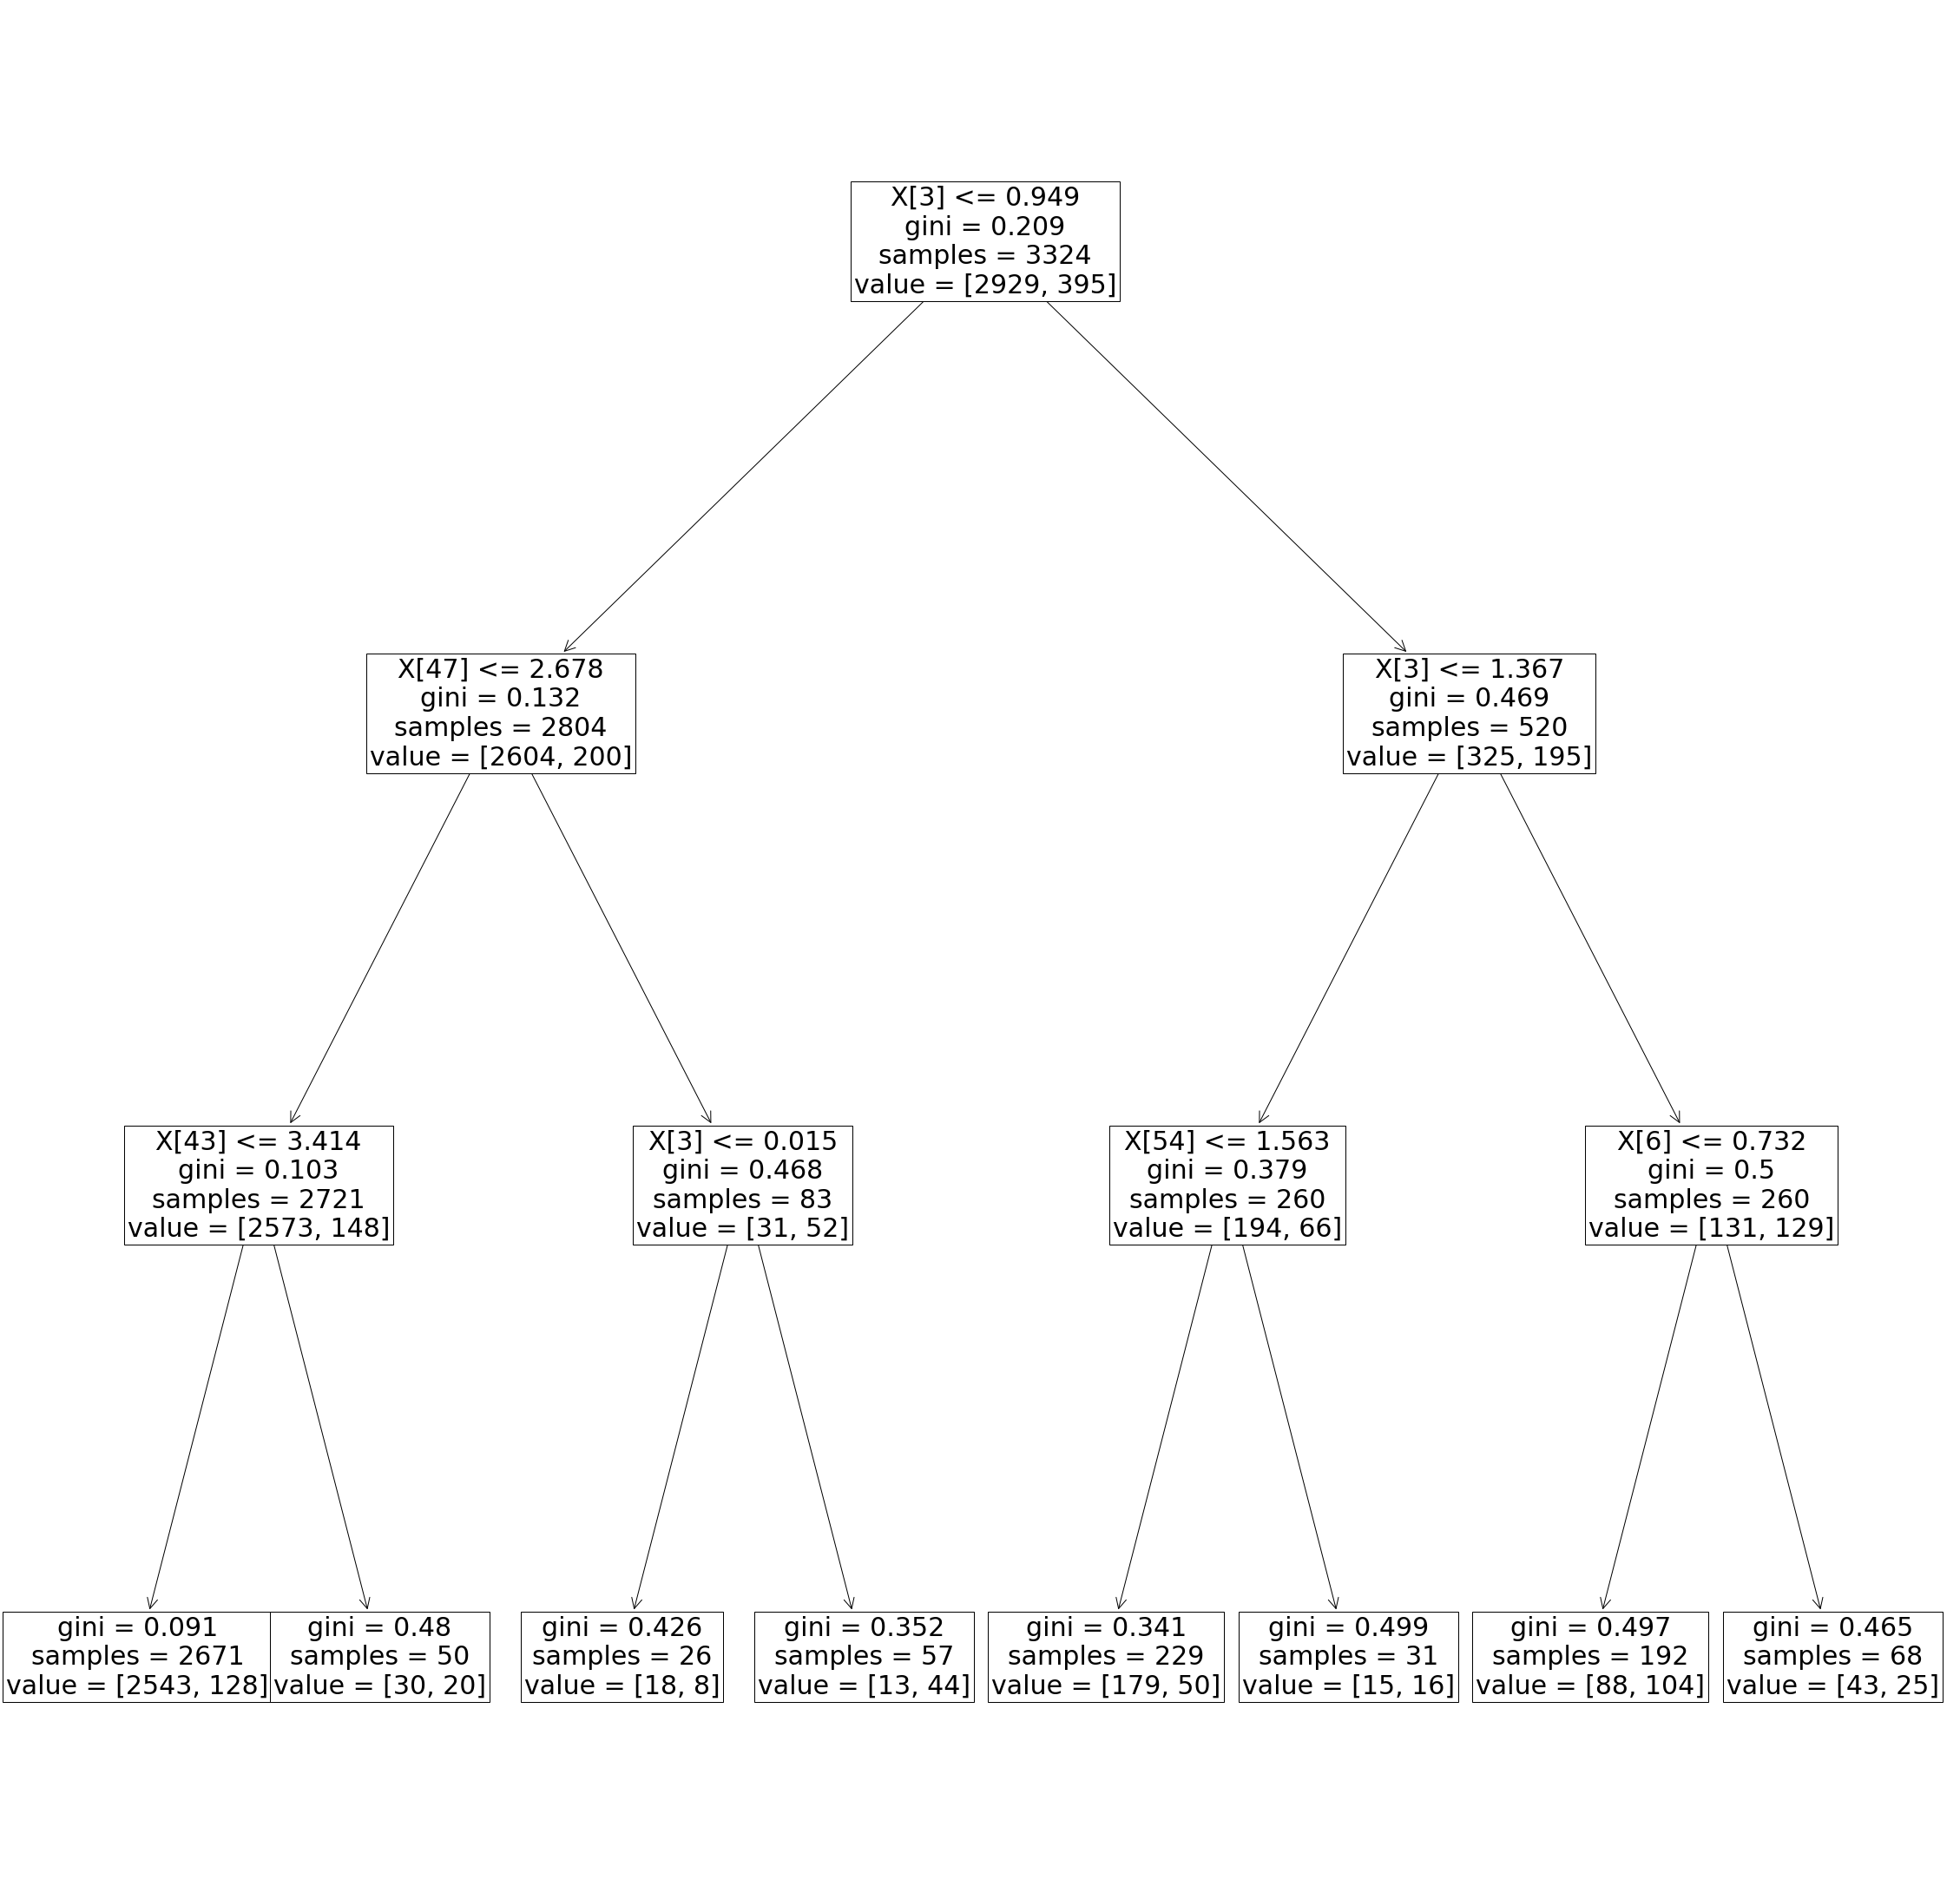

In [114]:
import sklearn.tree as tree
fig, ax = plt.subplots(figsize=(40, 40))
tree.plot_tree(clf3, fontsize=30)
plt.show()

In [115]:
X_train["predx"] = clf3.predict (X_train_scaled)
pd.crosstab (Y_train, X_train.predx)

predx,0.0,1.0
y_yes,,
0.0,2813,116
1.0,231,164


In [116]:
from sklearn.metrics import *
print ("Precision:", np.round (precision_score (Y_train, X_train.predx), 3))
print ("Recall:   ", np.round (recall_score (Y_train, X_train.predx), 3))

Precision: 0.586
Recall:    0.415


In [117]:
from sklearn.model_selection import cross_val_predict
bank_cv_predx = cross_val_predict (clf3,  X_train_scaled, Y_train, cv=5)
print ("Precision:", np.round (precision_score (Y_train, bank_cv_predx), 3))
print ("Recall:   ", np.round (recall_score (Y_train, bank_cv_predx), 3))

Precision: 0.581
Recall:    0.253


This is the best precision we have gotten with 5-fold validation however, recall has worsened. 

In [118]:
pd.crosstab (Y_train, bank_cv_predx)

col_0,0.0,1.0
y_yes,,
0.0,2857,72
1.0,295,100


This model with 5 fold validation has:
    
- 2857 true negatives
- 295 false negative
- 72 false positives
- 100 true positives

In [119]:
#feature importance score
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
feature_imp = pd.DataFrame(clf3.feature_importances_)
feature_imp.rename (columns={0: "Importance"})
feature_imp.set_index (X_train_scaled.columns)

,0
age,0.000000
day,0.000000
log_balance,0.000000
log_duration,0.587993
log_campaign,0.000000
job_admin.,0.000000
job_blue-collar,0.017217
job_entrepreneur,0.000000
job_housemaid,0.000000
job_management,0.000000


Log_duration, poutcome_success, and month_oct have the three highest feature importance scores. 

In [120]:
X_train_scaled.head()

,age,day,log_balance,log_duration,log_campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays_categorical_No Contact,pdays_categorical_less than 189,pdays_categorical_More than 189,previous_categorical_No Contact,previous_categorical_less than 2,previous_categorical_More than 2
0,1.762036,0.749007,0.969069,0.068996,-1.002631,2.933758,-0.507135,-0.204156,-0.167771,-0.525364,...,-0.366175,-0.204156,5.536889,-2.065872,-2.065872,3.007041,-0.31497,-2.065872,-0.353374,3.418629
1,-0.765724,1.114388,-0.017470,-0.960844,1.466949,-0.340860,-0.507135,-0.204156,-0.167771,-0.525364,...,-0.366175,-0.204156,-0.180607,0.484057,0.484057,-0.332553,-0.31497,0.484057,-0.353374,-0.292515
2,-0.110379,-1.199687,0.339631,-0.677871,1.679414,-0.340860,-0.507135,-0.204156,-0.167771,1.903441,...,-0.366175,-0.204156,-0.180607,0.484057,0.484057,-0.332553,-0.31497,0.484057,-0.353374,-0.292515
3,0.919449,-0.712513,-2.478414,0.635432,-1.002631,-0.340860,1.971861,-0.204156,-0.167771,-0.525364,...,-0.366175,-0.204156,-0.180607,0.484057,0.484057,-0.332553,-0.31497,0.484057,-0.353374,-0.292515
4,-1.327448,-0.225340,0.927479,1.080928,1.215655,-0.340860,-0.507135,-0.204156,-0.167771,-0.525364,...,-0.366175,-0.204156,-0.180607,0.484057,0.484057,-0.332553,-0.31497,0.484057,-0.353374,-0.292515


In [121]:
#fit the optimal tree (for precision) for the test set. 
#implement a decision tree with max depth 5 & min leaf samples 10 
from sklearn.tree import DecisionTreeClassifier
clf4 = DecisionTreeClassifier (max_depth=3, min_samples_leaf=20, random_state=42)
clf4.fit(X_test_scaled,Y_test)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=42)

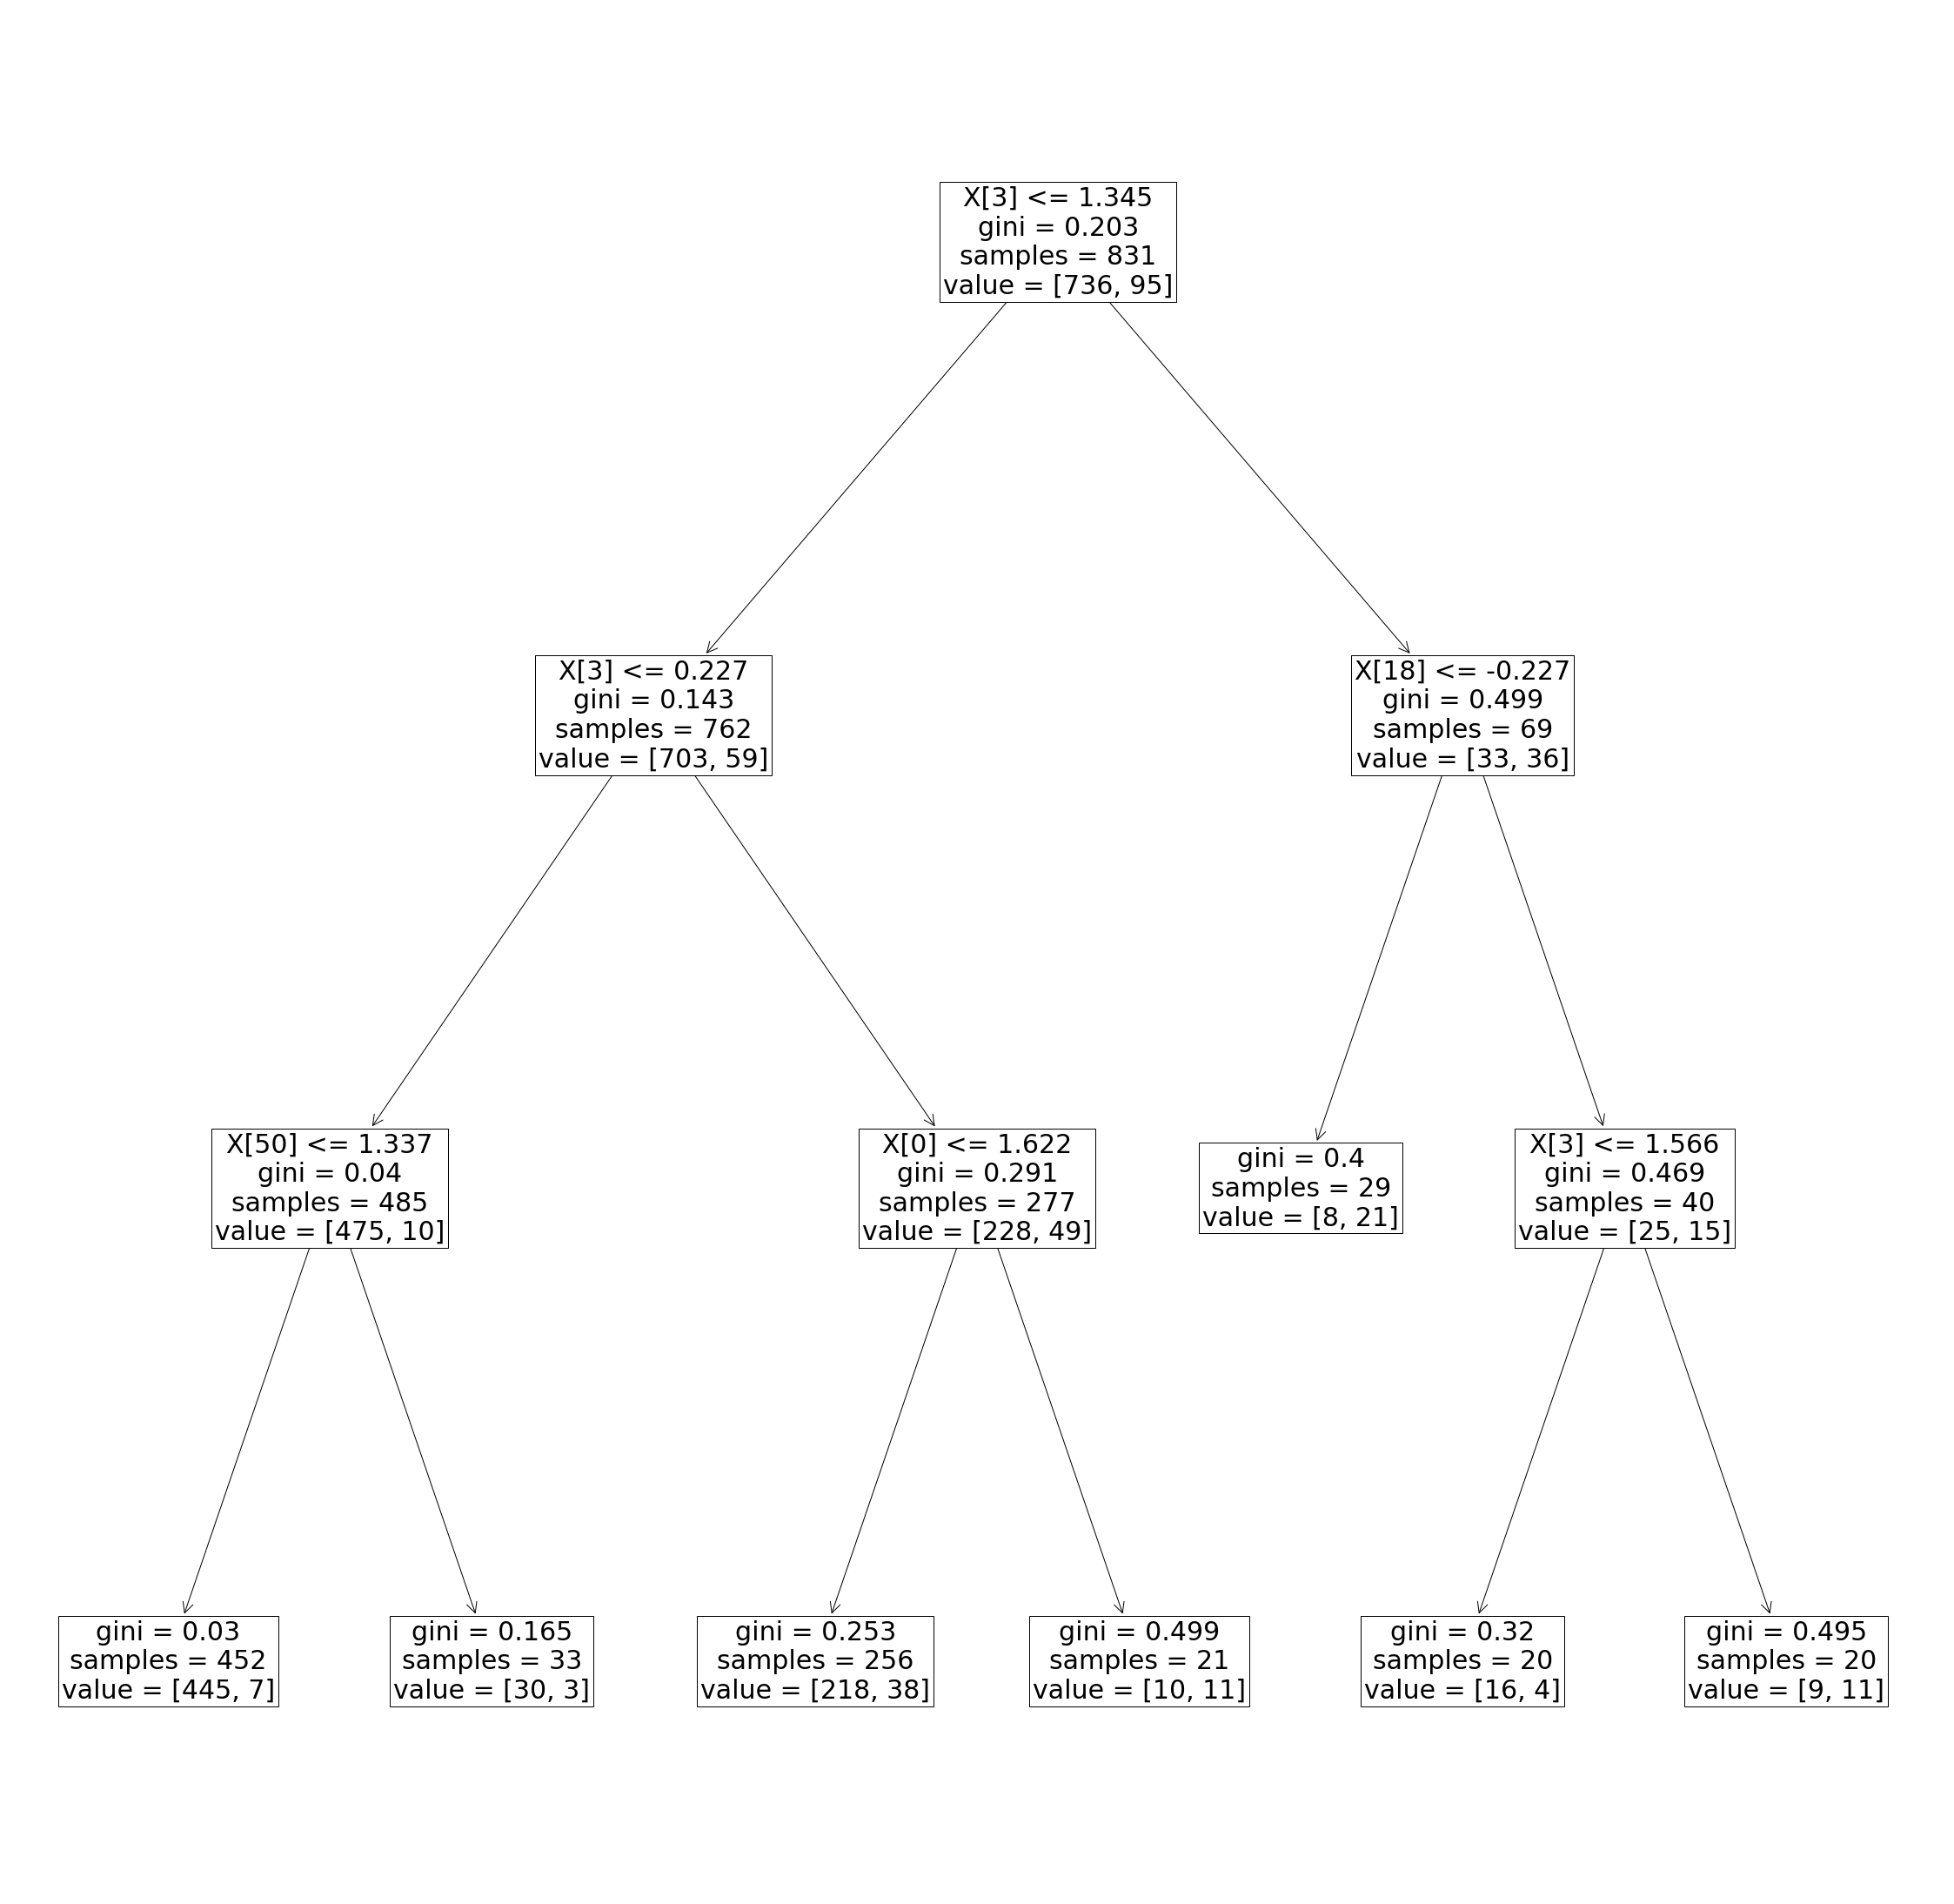

In [122]:
import sklearn.tree as tree
fig, ax = plt.subplots(figsize=(40, 40))
tree.plot_tree(clf4, fontsize=30)
plt.show()

In [123]:
X_test["predxt"] = clf4.predict (X_test_scaled)
pd.crosstab (Y_test, X_test.predxt)

predxt,0.0,1.0
y_yes,,
0.0,709,27
1.0,52,43


In [124]:
from sklearn.metrics import *
print ("Precision:", np.round (precision_score (Y_test, X_test.predxt), 3))
print ("Recall:   ", np.round (recall_score (Y_test, X_test.predxt), 3))

Precision: 0.614
Recall:    0.453


For the test set, precision is 0.614 and recall is 0.453. 

In [125]:
from sklearn.model_selection import cross_val_predict
bank_cv_predxt = cross_val_predict (clf4,  X_test_scaled, Y_test, cv=5)
print ("Precision:", np.round (precision_score (Y_test, bank_cv_predxt), 3))
print ("Recall:   ", np.round (recall_score (Y_test, bank_cv_predxt), 3))

Precision: 0.462
Recall:    0.253


With 5 fold validation precision is 0.462 and recall is 0.253. This is quite similar to the train set. 

### Stacked Bar Charts with leaf node results

3     2671
10     229
13     192
14      68
7       57
4       50
11      31
6       26
dtype: int64
(3324,) (3324, 55)


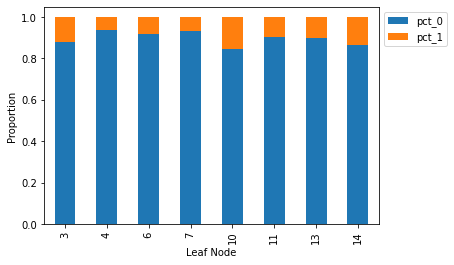

In [126]:
# Extract leaf node information and put it in a column of the data frame
#This one is for relative percentages of the positive and negative outcomes. 
leaves_bank = clf3.tree_.apply(X_train_scaled.values.astype('float32'))
print (pd.value_counts(leaves_bank))
print (leaves_bank.shape, X_train_scaled.shape)
X_train_scaled["leaf"] = leaves_bank
y_leaf = pd.crosstab(X_train_scaled.leaf, Y_train)
y_leaf
y_leaf["pct_0"] = y_leaf[0] / (y_leaf[0] + y_leaf[1])
y_leaf["pct_1"] = 1 - y_leaf.pct_0
y_leaf
y_leaf [["pct_0", "pct_1"]].plot.bar(stacked=True, ylabel="Proportion", xlabel="Leaf Node")
plt.legend (bbox_to_anchor=(1,1))
plt.show()

For all leaf nodes there is a larger proportion of negative outcomes. Due to the fact that our response variable y_yes has a larger proportion of no compared to yes this makes sense. 

In [127]:
y_leaf

y_yes,0.0,1.0,pct_0,pct_1
leaf,,,,
3,1712,234,0.879753,0.120247
4,30,2,0.937500,0.062500
6,22,2,0.916667,0.083333
7,40,3,0.930233,0.069767
10,146,27,0.843931,0.156069
11,19,2,0.904762,0.095238
13,122,14,0.897059,0.102941
14,45,7,0.865385,0.134615


In [130]:
y_leaf.reset_index (inplace=True)
y_leaf

y_yes,index,leaf,0.0,1.0,pct_0,pct_1
0,0,3,1712,234,0.879753,0.120247
1,1,4,30,2,0.937500,0.062500
2,2,6,22,2,0.916667,0.083333
3,3,7,40,3,0.930233,0.069767
4,4,10,146,27,0.843931,0.156069
5,5,11,19,2,0.904762,0.095238
6,6,13,122,14,0.897059,0.102941
7,7,14,45,7,0.865385,0.134615


In [131]:
#y_leaf2 = y_leaf.rename({2: 'False2', 3: 'True2'}, axis=1)
#print (y_leaf2.columns)
#y_leaf2
y_leaf.columns = ['index', 'leaf', '0', '1', 'pct0', 'pct1']
print (y_leaf.columns)
y_leaf

Index(['index', 'leaf', '0', '1', 'pct0', 'pct1'], dtype='object')


,index,leaf,0,1,pct0,pct1
0,0,3,1712,234,0.879753,0.120247
1,1,4,30,2,0.937500,0.062500
2,2,6,22,2,0.916667,0.083333
3,3,7,40,3,0.930233,0.069767
4,4,10,146,27,0.843931,0.156069
5,5,11,19,2,0.904762,0.095238
6,6,13,122,14,0.897059,0.102941
7,7,14,45,7,0.865385,0.134615


** if there is an error with the previous code please rerun the cell above to reset the index. It should fix the error. 

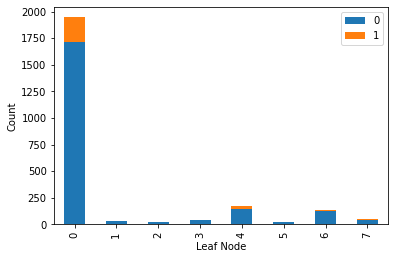

In [132]:
y_leaf [['0', '1']].plot.bar(stacked=True, ylabel="Count", xlabel="Leaf Node")
plt.legend (bbox_to_anchor=(1,1))
plt.show()

The first leaf node has a significantly higher amount of yes and no counts. 

# Logistic Regression

### Model 1

In [133]:
clf = LogisticRegression ()
X = bank2.iloc [:,:55]
y = bank2.y_yes
clf.fit (X=X, y=y)
bank2["pred"] = clf.predict (X)
pd.crosstab (y, bank2.pred)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


pred,0.0,1.0
y_yes,,
0.0,3587,78
1.0,329,161


The number of **true positives** is 161 and the number of **true negatives** is 3587. 

We then scaled the data so that each feature has a standard deviation of 1 and a mean of 0. 

In [134]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame (scaler.transform(X))
print (X.describe().T)
print (type (X_scaled))
X_scaled.columns = X.columns
print (X_scaled.describe().T)

                                   count       mean        std        min  \
age                               4155.0  41.297232  10.694177  19.000000   
day                               4155.0  15.872202   8.195098   1.000000   
log_balance                       4155.0   5.733704   2.571440  -0.693147   
log_duration                      4155.0   5.175186   0.949589   1.386294   
log_campaign                      4155.0   0.717168   0.718783   0.000000   
job_admin.                        4155.0   0.106137   0.308050   0.000000   
job_blue-collar                   4155.0   0.202166   0.401664   0.000000   
job_entrepreneur                  4155.0   0.038748   0.193018   0.000000   
job_housemaid                     4155.0   0.026233   0.159848   0.000000   
job_management                    4155.0   0.217329   0.412478   0.000000   
job_retired                       4155.0   0.052226   0.222510   0.000000   
job_self-employed                 4155.0   0.042118   0.200882   0.000000   

In [135]:
clf = LogisticRegression()
clf.fit (X=X_scaled, y=y)
bank2["pred"] = clf.predict (X_scaled)
pd.crosstab (y, bank2.pred)


pred,0.0,1.0
y_yes,,
0.0,3579,86
1.0,315,175


* True Positives: 175 
* False Positives: 86
* False Negatives: 315
* True Negatives: 3579

In [136]:
print ("precision:", round (precision_score (y, bank2.pred), 4))
print ("recall:   ", round (recall_score (y, bank2.pred), 4))
print ("F1 score: ", round (f1_score (y, bank2.pred), 4))

precision: 0.6705
recall:    0.3571
F1 score:  0.466


The logistic regression model using scaled features shows a precision of 0.6705 which is the highest we've seen so far. We used precision as the feature for the GridSearch and hence why we are not comparing the recall and F1, although they are useful.

> Indented block



### Model 2 - Polynomial


In [137]:
poly = PolynomialFeatures (degree = 2)
X_poly = pd.DataFrame (poly.fit_transform (X_scaled))
print (X_scaled.shape)
print (X_poly.shape)
print (X_poly.head(10))

(4155, 55)
(4155, 1596)
   0         1         2         3         4         5         6         7     \
0   1.0 -1.056518  0.381713  0.682420 -0.848615 -0.997873 -0.344587 -0.503382   
1   1.0 -0.775958 -0.594598  1.065824  0.230066 -0.997873 -0.344587 -0.503382   
2   1.0 -0.588918  0.015596  0.573349  0.047574 -0.997873 -0.344587 -0.503382   
3   1.0 -1.056518 -1.570909  0.608054  0.124405  0.931028 -0.344587 -0.503382   
4   1.0  1.655564 -1.326831 -2.499621  0.258405 -0.997873 -0.344587  1.986562   
5   1.0 -0.588918  0.869868  0.343180 -0.238475 -0.033423 -0.344587 -0.503382   
6   1.0 -0.495398 -0.228481 -0.002667  0.691642 -0.997873 -0.344587 -0.503382   
7   1.0 -0.214837 -1.204792 -0.289083 -0.166309 -0.033423 -0.344587 -0.503382   
8   1.0 -0.027797 -0.228481 -0.130503 -1.192380 -0.033423 -0.344587 -0.503382   
9   1.0 -0.214837  0.503752  1.327040  0.457396 -0.997873 -0.344587 -0.503382   

       8         9     ...       1586      1587      1588       1589  \
0 -0.200775 

In [138]:
# Logistic regression with polynomial degree=2 features.
clf = LogisticRegression()
clf.fit (X=X_poly, y=y)
bank2["predpoly"] = clf.predict (X_poly)
pd.crosstab (y, bank2.pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


pred,0.0,1.0
y_yes,,
0.0,3579,86
1.0,315,175


* True Positives: 417 
* False Positives: 29
* False Negatives: 73
* True Negatives: 3636

 This is slightly better than our original logistic regression model but still not as good. This could be due to our data, which we will explain later. 

In [142]:
print ("precision:", round (precision_score (y, bank2.predpoly), 4))
print ("recall:   ", round (recall_score (y, bank2.predpoly), 4))
print ("F1 score: ", round (f1_score (y, bank2.predpoly), 4))

precision: 0.935
recall:    0.851
F1 score:  0.891


The logistic regression model using polynoomial features shows a precision of 0.935 which is the highest we've seen so far. This might show that logistic regression using the polynomial features is the best model so far. 


We used precision as the feature for the GridSearch and hence why we are not comparing the recall and F1, although they are useful.

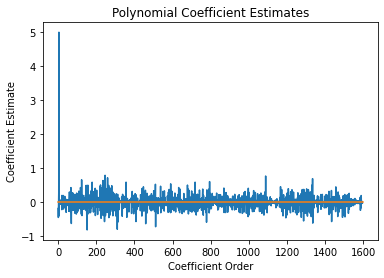

In [139]:
coeffs = pd.DataFrame (clf.coef_.T)
coeffs.columns = ["Coef_Est"]
plt.plot (np.arange (1596), coeffs.Coef_Est)
plt.plot ([0,1596], [0,0])
plt.title ("Polynomial Coefficient Estimates")
plt.xlabel ("Coefficient Order")
plt.ylabel ("Coefficient Estimate")
plt.show()

We are not sure what to make of the high peak at the start of the graph and will need to look into what is causing it. 
As discussed in our presentation, this could be due to an intercept being included or could be due to poor transformation of the data. 

### 5-Fold Cross Validation

In [140]:
precision_scores = cross_val_score (clf, X_poly, y, scoring='precision', cv=5)
print ("Cross Val Precision:", np.round (precision_scores, 4),
       "Mean:", np.round (np.mean (precision_scores), 4),
       "StDev:", np.round (np.std (precision_scores), 4))
       
recall_scores = cross_val_score (clf, X_poly, y, scoring='recall', cv=5)
print ("Cross Val Recall:   ", np.round (recall_scores, 4),
       "Mean:", np.round (np.mean (recall_scores), 4),
       "StDev:", np.round (np.std (recall_scores), 4))
       
f1_scores = cross_val_score (clf, X_poly, y, scoring='f1', cv=5)
print ("Cross Val F1-Score: ",  np.round (f1_scores, 4),
       "Mean:", np.round (np.mean (f1_scores), 4),
       "StDev:", np.round (np.std (f1_scores), 4))
       
cv_pred = cross_val_predict (clf, X_poly, y, cv=5)
print ("\nOverall CV Precision", np.round (precision_score (y, cv_pred), 4))
print ("Overall CV Recall   ", np.round (recall_score (y, cv_pred), 4))
print ("Overall CV f1_macro ", np.round (f1_score (y, cv_pred), 4))
print ("Cross Validated Confusion Matrix:")
pd.crosstab (y, cv_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross Val Precision: [0.45   0.4222 0.4643 0.481  0.4205] Mean: 0.4476 StDev: 0.0236


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross Val Recall:    [0.4592 0.3878 0.398  0.3878 0.3776] Mean: 0.402 StDev: 0.0293


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross Val F1-Score:  [0.4545 0.4043 0.4286 0.4294 0.3978] Mean: 0.4229 StDev: 0.0203


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Overall CV Precision 0.4467
Overall CV Recall    0.402
Overall CV f1_macro  0.4232
Cross Validated Confusion Matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


col_0,0.0,1.0
y_yes,,
0.0,3421,244
1.0,293,197


The 5-fold cross validation shows the following:
* True Positives: 197 
* False Positives: 244
* False Negatives: 293
* True Negatives: 3421

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


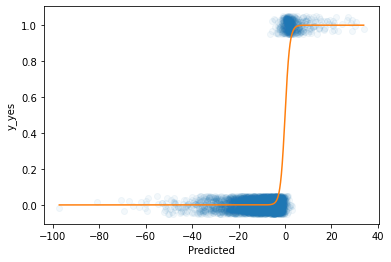

In [141]:
PredProb = clf.predict_proba (X_poly) [:,1]
PredLogit = np.log (PredProb / (1 - PredProb))

sb.regplot (x=PredLogit, y=y, y_jitter=0.05, fit_reg=False, scatter_kws = {'alpha' : 1/20})

plt.plot (np.sort (PredLogit), np.sort (PredProb))
plt.xlabel ("Predicted")
plt.show()

The sigmoid graph show two very distinct groups of values at 0 (did not subscribe to a term deposit) and 1 (subscribed to a term deposit). There seems to be some overlap in around predicted 0. 

# Results and Conclusion

We used the grid search to optimize precision. Max_depth=3 and min_samples_leaf=20 are the best parameters to optimize precision. From this model, the precision was 0.581 and the recall was 0.253. Thus, the model is fairly inaccurate in predicting if a client subcribed or not. 

The most important feature under these conditions was log_duration. This makes sense because how long the call lasts for is indicative to if the message was communicated to the client and the deal being closed upon the client understanding the goals of the campaign in the first place. 

Using the logistic regression model, we did not get a lot of true positives, but our precision was very high with the polynomial features. This shows that the logistic regression model, using polynomial features, might be better in comparison to the decision trees. 

The reason out data might have shows a low number of true positives could be because our data has an uneven distribution of true and false values for our predictor variable(y). This may be a reason why our true positive rates are lower than we were expecting in all the models we have. In the future, maybe tweeking the data set to have a generally equal split might provide with better results. 


Given the nature of the dataset (prediciting human behaviour- which is difficult) and the results of our model, we are having difficulty answering our research questions. Log_duration being the most important feauture on the decision tree alludes to the significance of the duration phonecall towards the success of the campaign. This feature potentially also impacts the effectiveness of the others. Furthermore, poutcome_sucess was another importance feature meaning clients who subcribed to previous accounts seemed to have a higher propensity to subcribe to this one. We are not able to discern the importance of education. Given the outcomes of the models, this feature seems like it is not critical towards the client subcribing. 